In [ ]:
!pip install skfeature-chappers

In [ ]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
seaborn.set(style='ticks')
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/tubes ildat
!ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/18quLnhTJtr5tvUPGKKoCZ75p_6joLhhB/tubes ildat
data_keuangan_labeled.csv  finance_boosting_model.sav  scaler_finance.sav
dataset_keuangan.csv	   scaler_finance_bagging.sav


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/tubes ildat/data_keuangan_labeled.csv'
df = pd.read_csv(file_path)
display(df.head())

,Gaji,Tabungan Lama,Investasi,Pemasukan Lainnya,Tipe,Bahan Pokok,Protein & Gizi Tambahan,Tempat Tinggal,Sandang,Konsumsi Praktis,Barang & Jasa Sekunder,Pengeluaran Tidak Esensial,Pajak,Asuransi,Sosial & Budaya,Tabungan / Investasi,cluster,cluster_label
0,24333000.0,1629000.0,7891000.0,3861000.0,normal,3694000.0,3570000.0,10682000.0,994000.0,5563000.0,5140000.0,1282000.0,876000.0,528000.0,458000.0,4950000.0,0,Rawan Finansial
1,3535000.0,733000.0,785000.0,659000.0,hemat,383000.0,994000.0,1432000.0,134000.0,438000.0,475000.0,230000.0,159000.0,263000.0,174000.0,1062000.0,1,Menengah Stabil
2,65000000.0,9642000.0,13643000.0,10842000.0,hemat,7849000.0,13081000.0,24853000.0,1810000.0,3819000.0,6465000.0,2545000.0,4910000.0,3580000.0,4686000.0,24775000.0,2,Sehat Finansial
3,54676000.0,5037000.0,18466000.0,4826000.0,normal,5367000.0,13703000.0,16628000.0,2746000.0,8826000.0,11029000.0,3489000.0,2308000.0,2015000.0,1759000.0,14771000.0,2,Sehat Finansial
4,24298000.0,4665000.0,4964000.0,2649000.0,boros,2169000.0,5477000.0,7866000.0,366000.0,8454000.0,6060000.0,2956000.0,277000.0,285000.0,438000.0,2300000.0,0,Rawan Finansial


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gaji                        16000 non-null  float64
 1   Tabungan Lama               16000 non-null  float64
 2   Investasi                   16000 non-null  float64
 3   Pemasukan Lainnya           16000 non-null  float64
 4   Tipe                        16000 non-null  object 
 5   Bahan Pokok                 16000 non-null  float64
 6   Protein & Gizi Tambahan     16000 non-null  float64
 7   Tempat Tinggal              16000 non-null  float64
 8   Sandang                     16000 non-null  float64
 9   Konsumsi Praktis            16000 non-null  float64
 10  Barang & Jasa Sekunder      16000 non-null  float64
 11  Pengeluaran Tidak Esensial  16000 non-null  float64
 12  Pajak                       16000 non-null  float64
 13  Asuransi                    160

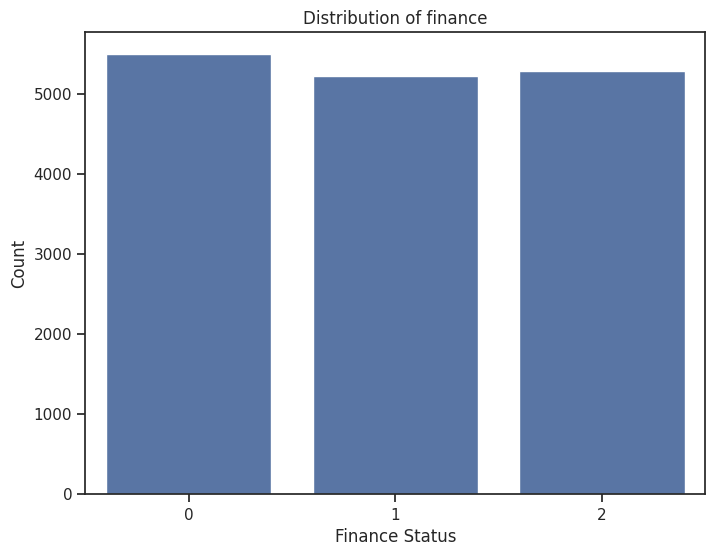

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame as defined in the previous code

plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df)
plt.title('Distribution of finance')
plt.xlabel('Finance Status')
plt.ylabel('Count')
plt.show()

In [ ]:
dataset = df.drop(columns='cluster_label')

In [ ]:
mapping_tipe = {
    'hemat': 0,
    'normal': 1,
    'boros': 2
}

dataset['Tipe'] = dataset['Tipe'].map(mapping_tipe)
dataset

,Gaji,Tabungan Lama,Investasi,Pemasukan Lainnya,Tipe,Bahan Pokok,Protein & Gizi Tambahan,Tempat Tinggal,Sandang,Konsumsi Praktis,Barang & Jasa Sekunder,Pengeluaran Tidak Esensial,Pajak,Asuransi,Sosial & Budaya,Tabungan / Investasi,cluster
0,24333000.0,1629000.0,7891000.0,3861000.0,1,3694000.0,3570000.0,10682000.0,994000.0,5563000.0,5140000.0,1282000.0,876000.0,528000.0,458000.0,4950000.0,0
1,3535000.0,733000.0,785000.0,659000.0,0,383000.0,994000.0,1432000.0,134000.0,438000.0,475000.0,230000.0,159000.0,263000.0,174000.0,1062000.0,1
2,65000000.0,9642000.0,13643000.0,10842000.0,0,7849000.0,13081000.0,24853000.0,1810000.0,3819000.0,6465000.0,2545000.0,4910000.0,3580000.0,4686000.0,24775000.0,2
3,54676000.0,5037000.0,18466000.0,4826000.0,1,5367000.0,13703000.0,16628000.0,2746000.0,8826000.0,11029000.0,3489000.0,2308000.0,2015000.0,1759000.0,14771000.0,2
4,24298000.0,4665000.0,4964000.0,2649000.0,2,2169000.0,5477000.0,7866000.0,366000.0,8454000.0,6060000.0,2956000.0,277000.0,285000.0,438000.0,2300000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,38323000.0,4781000.0,11977000.0,6186000.0,2,3317000.0,7279000.0,10936000.0,1968000.0,11867000.0,13335000.0,6414000.0,543000.0,369000.0,594000.0,4709000.0,0
15996,13432000.0,2485000.0,4412000.0,1166000.0,1,2864000.0,3543000.0,7092000.0,382000.0,1506000.0,2290000.0,719000.0,353000.0,644000.0,358000.0,1873000.0,1
15997,22432000.0,3639000.0,8754000.0,5595000.0,0,1922000.0,5125000.0,11150000.0,631000.0,3321000.0,4375000.0,1056000.0,1263000.0,1052000.0,1562000.0,8887000.0,0
15998,22499000.0,4321000.0,7354000.0,2934000.0,0,3641000.0,3978000.0,10231000.0,960000.0,3589000.0,2492000.0,822000.0,1472000.0,1425000.0,1161000.0,7332000.0,0


#Memisahkan feature dan label

In [ ]:
X = dataset.drop(columns=['cluster'])
y = dataset['cluster']

In [ ]:
X

,Gaji,Tabungan Lama,Investasi,Pemasukan Lainnya,Tipe,Bahan Pokok,Protein & Gizi Tambahan,Tempat Tinggal,Sandang,Konsumsi Praktis,Barang & Jasa Sekunder,Pengeluaran Tidak Esensial,Pajak,Asuransi,Sosial & Budaya,Tabungan / Investasi
0,24333000.0,1629000.0,7891000.0,3861000.0,1,3694000.0,3570000.0,10682000.0,994000.0,5563000.0,5140000.0,1282000.0,876000.0,528000.0,458000.0,4950000.0
1,3535000.0,733000.0,785000.0,659000.0,0,383000.0,994000.0,1432000.0,134000.0,438000.0,475000.0,230000.0,159000.0,263000.0,174000.0,1062000.0
2,65000000.0,9642000.0,13643000.0,10842000.0,0,7849000.0,13081000.0,24853000.0,1810000.0,3819000.0,6465000.0,2545000.0,4910000.0,3580000.0,4686000.0,24775000.0
3,54676000.0,5037000.0,18466000.0,4826000.0,1,5367000.0,13703000.0,16628000.0,2746000.0,8826000.0,11029000.0,3489000.0,2308000.0,2015000.0,1759000.0,14771000.0
4,24298000.0,4665000.0,4964000.0,2649000.0,2,2169000.0,5477000.0,7866000.0,366000.0,8454000.0,6060000.0,2956000.0,277000.0,285000.0,438000.0,2300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,38323000.0,4781000.0,11977000.0,6186000.0,2,3317000.0,7279000.0,10936000.0,1968000.0,11867000.0,13335000.0,6414000.0,543000.0,369000.0,594000.0,4709000.0
15996,13432000.0,2485000.0,4412000.0,1166000.0,1,2864000.0,3543000.0,7092000.0,382000.0,1506000.0,2290000.0,719000.0,353000.0,644000.0,358000.0,1873000.0
15997,22432000.0,3639000.0,8754000.0,5595000.0,0,1922000.0,5125000.0,11150000.0,631000.0,3321000.0,4375000.0,1056000.0,1263000.0,1052000.0,1562000.0,8887000.0
15998,22499000.0,4321000.0,7354000.0,2934000.0,0,3641000.0,3978000.0,10231000.0,960000.0,3589000.0,2492000.0,822000.0,1472000.0,1425000.0,1161000.0,7332000.0


# Feature Selection

In [ ]:
from skfeature.function.information_theoretical_based import MRMR

# convert menjadi numpy array
X_np = X.values
y_np = y.values

# MRMR sebelum scaling
ranked_index = MRMR.mrmr(X_np, y_np, n_selected_features=X_np.shape[1])

print("\nMRMR Ranking Index:")
print(ranked_index)

# fitur terurut sesuai MRMR
X_mrmr = X_np[:, ranked_index]

print("\nFitur hasil urutan MRMR:")
print(X_mrmr)


MRMR Ranking Index:
[15 11  7  1  2  3  4 10 14 12  9  6 13  5  0  8]

Fitur hasil urutan MRMR:
[[ 4950000.  1282000. 10682000. ...  3694000. 24333000.   994000.]
 [ 1062000.   230000.  1432000. ...   383000.  3535000.   134000.]
 [24775000.  2545000. 24853000. ...  7849000. 65000000.  1810000.]
 ...
 [ 8887000.  1056000. 11150000. ...  1922000. 22432000.   631000.]
 [ 7332000.   822000. 10231000. ...  3641000. 22499000.   960000.]
 [ 4421000.   773000.  7163000. ...  2199000. 13675000.   235000.]]


#Membagi dataset menjadi data training dan data testing

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_mrmr, y_np, test_size=0.3, random_state=42, stratify=y_np
)

#Feature scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_raw)

# save
joblib.dump(scaler, '/content/drive/My Drive/tubes ildat/scaler_finance_bagging.sav')

# load (opsional)
scaler = joblib.load('/content/drive/My Drive/tubes ildat/scaler_finance_bagging.sav')

# transform
X_train = scaler.transform(X_train_raw)
X_test  = scaler.transform(X_test_raw)

#Hyperparameter optimization

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV # Import RandomizedSearchCV

# defining parameter range
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy']
 }

#classifier = AdaBoostClassifier()
classifier = RandomForestClassifier()

#tolong perhatikan parameter scoring dan cv
model = RandomizedSearchCV(classifier, param_distributions=param_grid, n_iter=20, scoring='roc_auc_ovr', cv=5, refit = True, verbose = 3, random_state=42)

# fitting the model for grid search
model.fit(X_train, y_train)

# print best parameter after tuning
print('parameter terbaik:',model.best_params_)

# print how our model looks after hyper-parameter tuning
print(model.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100;, score=0.999 total time=   3.3s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100;, score=0.999 total time=   4.6s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100;, score=0.999 total time=   3.4s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100;, score=0.999 total time=   3.3s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100;, score=0.999 total time=   3.4s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=log2, n_estimators=200;, score=0.999 total time=   7.8s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=log2, n_estimators=200;, score=0.999 total time=   7.2s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=log2, n_estimators=200;, score=0.999 total time=   7.5s
[CV 4/5] END crite

# Hasil Prediksi


In [ ]:
predictions = model.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1648
           1       0.99      0.98      0.98      1567
           2       0.98      0.98      0.98      1585

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



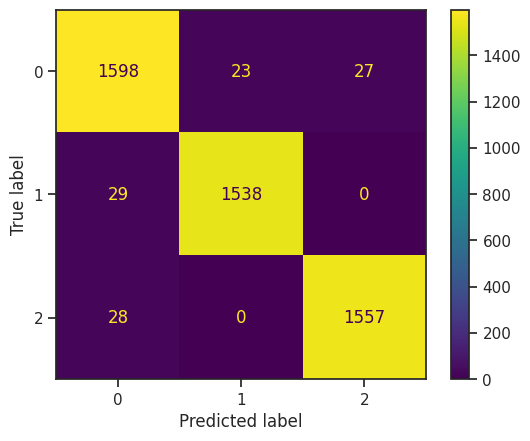

In [ ]:
#plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

# Save Model


In [ ]:
import joblib

# save the model to disk
filename = '/content/drive/My Drive/tubes ildat/finance_boosting_model_bagging.sav'
joblib.dump(model.best_estimator_, filename)

# load the model from disk
loaded_model = joblib.load(filename)
print(loaded_model)
#result = loaded_model.score(X_test, y_test)
print('Hasil model menggunakan model yang sudah disimpan:',loaded_model.score(X_test, y_test))
print('Hasil model menggunakan model hasil training langsung:',model.score(X_test, y_test))

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=200)
Hasil model menggunakan model yang sudah disimpan: 0.9777083333333333
Hasil model menggunakan model hasil training langsung: 0.9992253667701879
